In [ ]:
import os
import zipfile

local_zip= '/tmp/horse-or-human.zip'
zip_ref= zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip= '/tmp/validation-horse-or-human.zip'
zip_ref= zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
train_horses_dir= os.path.join('/tmp/horse-or-human/horses')
train_human_dir= os.path.join('/tmp/horse-or-human/humans')
validation_horses_dir= os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir= os.path.join('/tmp/validation-horse-or-human/humans')

In [ ]:
train_horse_names= os.listdir(train_horses_dir)
print(train_horse_names[:10])
train_human_names= os.listdir(train_human_dir)
print(train_human_names[:10])
validation_horse_names= os.listdir(validation_horses_dir)
print(validation_horse_names[:10])
validation_human_names= os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse17-4.png', 'horse33-7.png', 'horse22-6.png', 'horse03-3.png', 'horse38-1.png', 'horse17-6.png', 'horse14-2.png', 'horse46-9.png', 'horse40-6.png', 'horse23-6.png']
['human11-14.png', 'human06-11.png', 'human16-24.png', 'human14-01.png', 'human15-06.png', 'human12-23.png', 'human10-00.png', 'human15-04.png', 'human06-20.png', 'human03-06.png']
['horse3-198.png', 'horse4-588.png', 'horse2-412.png', 'horse5-589.png', 'horse5-002.png', 'horse1-105.png', 'horse4-501.png', 'horse3-498.png', 'horse5-303.png', 'horse5-192.png']
['valhuman05-03.png', 'valhuman05-01.png', 'valhuman05-00.png', 'valhuman02-15.png', 'valhuman03-16.png', 'valhuman03-00.png', 'valhuman01-22.png', 'valhuman01-17.png', 'valhuman02-11.png', 'valhuman02-16.png']


In [ ]:
print('total horse images:',len(train_horse_names))
print('total human images:',len(train_human_names))
print('total validation horse images:',len(validation_horse_names))
print('total validation human images:',len(validation_human_names))

total horse images: 500
total human images: 527
total validation horse images: 128
total validation human images: 128


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage

n_rows= 4
n_cols= 4
pic_index= 0

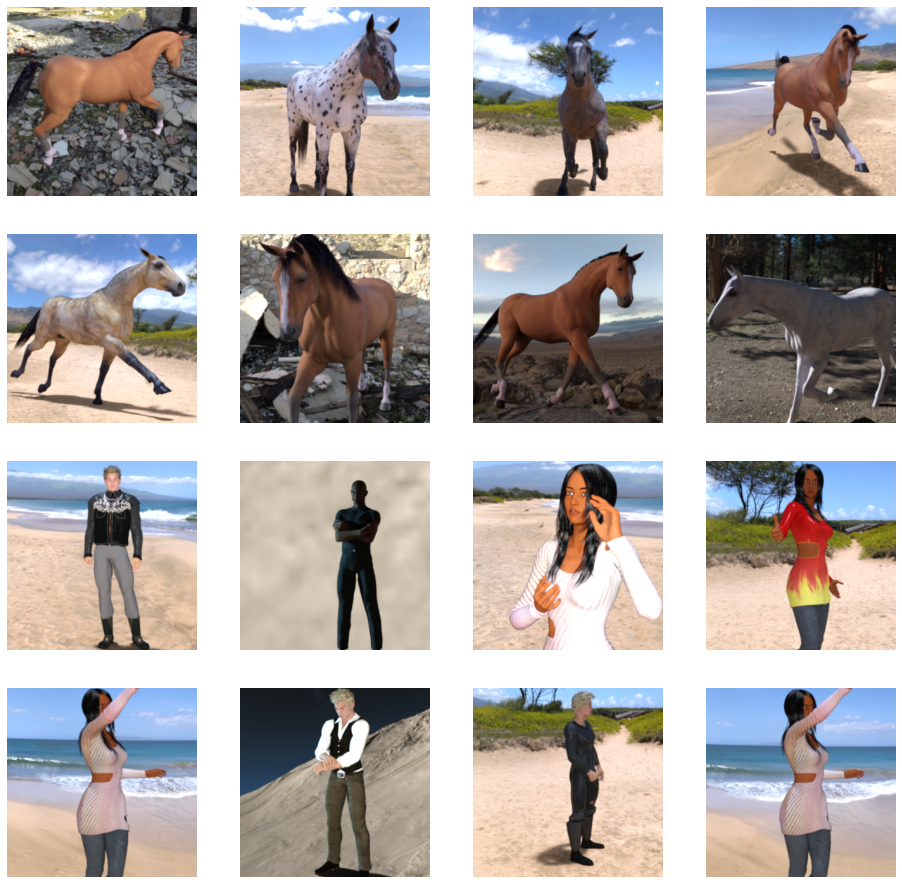

In [ ]:
fig = plt.gcf()
fig.set_size_inches(n_cols * 4, n_rows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horses_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(n_rows, n_cols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimage.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16,(3,3),activation= 'relu',input_shape=(300,300,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Dropout(0.5),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation= 'relu'),
                                   tf.keras.layers.Dense(2,activation= 'softmax')


])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop

  

model.compile(loss= 'sparse_categorical_crossentropy',optimizer= RMSprop(lr= 0.0001),metrics= ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale= 1./255)
validation_datagen= ImageDataGenerator(rescale= 1./255)
train_generator= train_datagen.flow_from_directory('/tmp/horse-or-human/',target_size= (300,300),batch_size= 128, class_mode= 'binary')
validation_generator= validation_datagen.flow_from_directory('/tmp/validation-horse-or-human/',target_size= (300,300),batch_size= 32, class_mode= 'binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
early_stopping= tf.keras.callbacks.EarlyStopping(patience=3)
rms_history= model.fit(train_generator,steps_per_epoch= 8,epochs= 7,verbose= 1,validation_data= validation_generator,validation_steps= 8,callbacks= [early_stopping])

Epoch 1/7
8/8 [==============================] - 6s 781ms/step - loss: 0.6880 - accuracy: 0.5083 - val_loss: 0.6520 - val_accuracy: 0.7461
Epoch 2/7
8/8 [==============================] - 7s 815ms/step - loss: 0.6412 - accuracy: 0.7664 - val_loss: 0.5754 - val_accuracy: 0.8320
Epoch 3/7
8/8 [==============================] - 8s 940ms/step - loss: 0.5782 - accuracy: 0.7798 - val_loss: 0.5512 - val_accuracy: 0.6523
Epoch 4/7
8/8 [==============================] - 7s 821ms/step - loss: 0.5555 - accuracy: 0.8109 - val_loss: 0.4846 - val_accuracy: 0.7461
Epoch 5/7
8/8 [==============================] - 6s 808ms/step - loss: 0.5159 - accuracy: 0.8076 - val_loss: 0.4457 - val_accuracy: 0.7852
Epoch 6/7
8/8 [==============================] - 6s 812ms/step - loss: 0.4088 - accuracy: 0.8910 - val_loss: 0.3611 - val_accuracy: 0.8398
Epoch 7/7
8/8 [==============================] - 7s 880ms/step - loss: 0.3278 - accuracy: 0.9180 - val_loss: 0.5168 - val_accuracy: 0.7617


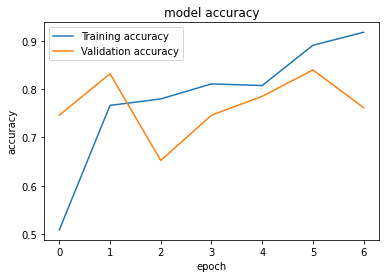

In [ ]:
plt.plot(rms_history.history['accuracy'], label= 'Training accuracy')
plt.plot(rms_history.history['val_accuracy'], label= 'Validation accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

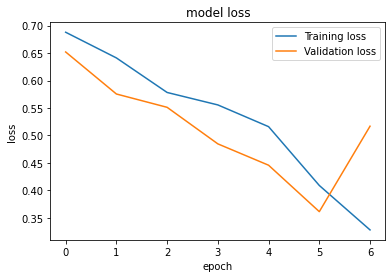

In [ ]:
plt.plot(rms_history.history['loss'], label= 'Training loss')
plt.plot(rms_history.history['val_loss'], label= 'Validation loss')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.compile(loss= 'sparse_categorical_crossentropy',optimizer= 'sgd',metrics= ['accuracy'])

In [ ]:
#early_stopping= tf.keras.callbacks.EarlyStopping()
sgd_history= model.fit(train_generator,steps_per_epoch= 8,epochs= 7,verbose= 1,validation_data= validation_generator,validation_steps= 8,callbacks= [early_stopping])

Epoch 1/7
8/8 [==============================] - 8s 942ms/step - loss: 0.3755 - accuracy: 0.8198 - val_loss: 0.4276 - val_accuracy: 0.8242
Epoch 2/7
8/8 [==============================] - 7s 919ms/step - loss: 0.2752 - accuracy: 0.9032 - val_loss: 0.5073 - val_accuracy: 0.8086
Epoch 3/7
8/8 [==============================] - 6s 802ms/step - loss: 0.2236 - accuracy: 0.9399 - val_loss: 0.8423 - val_accuracy: 0.6875
Epoch 4/7
8/8 [==============================] - 6s 805ms/step - loss: 0.2076 - accuracy: 0.9288 - val_loss: 0.3082 - val_accuracy: 0.8906
Epoch 5/7
8/8 [==============================] - 6s 806ms/step - loss: 0.3114 - accuracy: 0.8754 - val_loss: 0.6537 - val_accuracy: 0.7930
Epoch 6/7
8/8 [==============================] - 7s 847ms/step - loss: 0.1737 - accuracy: 0.9512 - val_loss: 0.5082 - val_accuracy: 0.8477
Epoch 7/7
8/8 [==============================] - 6s 791ms/step - loss: 0.1977 - accuracy: 0.9277 - val_loss: 0.4379 - val_accuracy: 0.8594


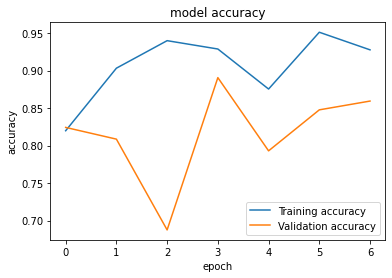

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sgd_history.history['accuracy'], label= 'Training accuracy')
plt.plot(sgd_history.history['val_accuracy'], label= 'Validation accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

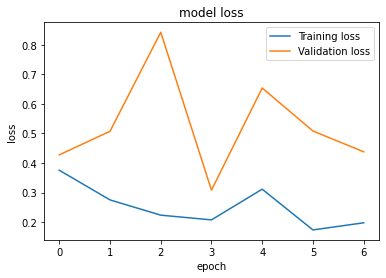

In [ ]:
plt.plot(sgd_history.history['loss'], label= 'Training loss')
plt.plot(sgd_history.history['val_loss'], label= 'Validation loss')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.compile(loss= 'sparse_categorical_crossentropy',optimizer= 'adam',metrics= ['accuracy'])

In [ ]:
#early_stopping= tf.keras.callbacks.EarlyStopping()
adam_history= model.fit(train_generator,steps_per_epoch= 8,epochs= 7,verbose= 1,validation_data= validation_generator,validation_steps= 8,callbacks= [early_stopping])

Epoch 1/7
8/8 [==============================] - 7s 843ms/step - loss: 1.3015 - accuracy: 0.5895 - val_loss: 0.6287 - val_accuracy: 0.8086
Epoch 2/7
8/8 [==============================] - 6s 802ms/step - loss: 0.6248 - accuracy: 0.8165 - val_loss: 0.5828 - val_accuracy: 0.6016
Epoch 3/7
8/8 [==============================] - 7s 904ms/step - loss: 0.4821 - accuracy: 0.7753 - val_loss: 1.0238 - val_accuracy: 0.5195
Epoch 4/7
8/8 [==============================] - 6s 809ms/step - loss: 0.3515 - accuracy: 0.8376 - val_loss: 0.3426 - val_accuracy: 0.8516
Epoch 5/7
8/8 [==============================] - 7s 848ms/step - loss: 0.1888 - accuracy: 0.9258 - val_loss: 1.2374 - val_accuracy: 0.8047
Epoch 6/7
8/8 [==============================] - 6s 795ms/step - loss: 0.1263 - accuracy: 0.9488 - val_loss: 1.3324 - val_accuracy: 0.8242
Epoch 7/7
8/8 [==============================] - 6s 806ms/step - loss: 0.1660 - accuracy: 0.9310 - val_loss: 1.0032 - val_accuracy: 0.8359


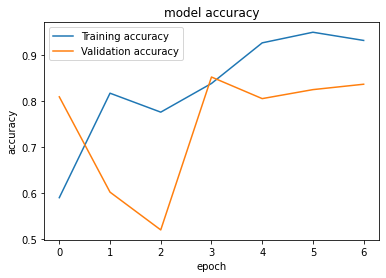

In [ ]:
plt.plot(adam_history.history['accuracy'], label= 'Training accuracy')
plt.plot(adam_history.history['val_accuracy'], label= 'Validation accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

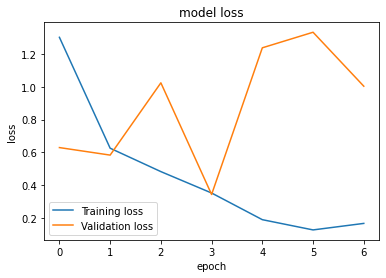

In [ ]:
plt.plot(adam_history.history['loss'], label= 'Training loss')
plt.plot(adam_history.history['val_loss'], label= 'Validation loss')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Nadam
model.compile(loss= 'sparse_categorical_crossentropy',optimizer= Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004),metrics= ['accuracy'])

In [ ]:
#early_stopping= tf.keras.callbacks.EarlyStopping()
nadam_history= model.fit(train_generator,steps_per_epoch= 8,epochs= 7,verbose= 1,validation_data= validation_generator,validation_steps= 8,callbacks= [early_stopping])

Epoch 1/7
8/8 [==============================] - 7s 836ms/step - loss: 0.6602 - accuracy: 0.8176 - val_loss: 0.9931 - val_accuracy: 0.8828
Epoch 2/7
8/8 [==============================] - 6s 804ms/step - loss: 0.4003 - accuracy: 0.8509 - val_loss: 0.6926 - val_accuracy: 0.8672
Epoch 3/7
8/8 [==============================] - 6s 799ms/step - loss: 0.2636 - accuracy: 0.9121 - val_loss: 0.2851 - val_accuracy: 0.9023
Epoch 4/7
8/8 [==============================] - 6s 805ms/step - loss: 0.1511 - accuracy: 0.9366 - val_loss: 0.5079 - val_accuracy: 0.8867
Epoch 5/7
8/8 [==============================] - 6s 797ms/step - loss: 0.0474 - accuracy: 0.9844 - val_loss: 0.6097 - val_accuracy: 0.8867
Epoch 6/7
8/8 [==============================] - 6s 802ms/step - loss: 0.0588 - accuracy: 0.9778 - val_loss: 0.4343 - val_accuracy: 0.9062


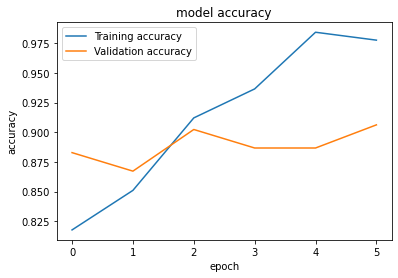

In [ ]:
plt.plot(nadam_history.history['accuracy'], label= 'Training accuracy')
plt.plot(nadam_history.history['val_accuracy'], label= 'Validation accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

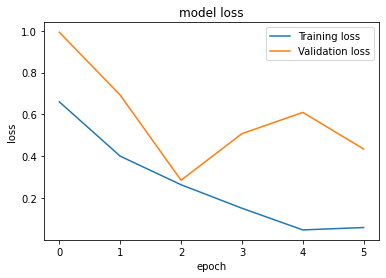

In [ ]:
plt.plot(nadam_history.history['loss'], label= 'Training loss')
plt.plot(nadam_history.history['val_loss'], label= 'Validation loss')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adagrad
model.compile(loss= 'sparse_categorical_crossentropy',optimizer= Adagrad(lr=0.01, epsilon=1e-08, decay=0.0),metrics= ['accuracy'])

In [ ]:
#early_stopping= tf.keras.callbacks.EarlyStopping()
adagrad_history= model.fit(train_generator,steps_per_epoch= 8,epochs= 7,verbose= 1,validation_data= validation_generator,validation_steps= 8,callbacks= [early_stopping])

Epoch 1/7
8/8 [==============================] - 7s 816ms/step - loss: 0.0170 - accuracy: 0.9922 - val_loss: 1.4330 - val_accuracy: 0.8477
Epoch 2/7
8/8 [==============================] - 6s 796ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 1.4608 - val_accuracy: 0.8516
Epoch 3/7
8/8 [==============================] - 6s 799ms/step - loss: 0.0081 - accuracy: 0.9989 - val_loss: 1.4782 - val_accuracy: 0.8594
Epoch 4/7
8/8 [==============================] - 6s 792ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.4801 - val_accuracy: 0.8633


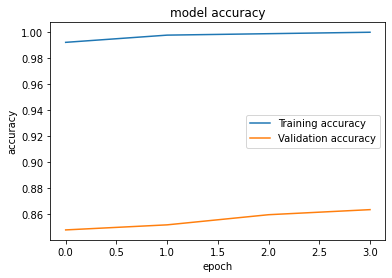

In [ ]:
plt.plot(adagrad_history.history['accuracy'], label= 'Training accuracy')
plt.plot(adagrad_history.history['val_accuracy'], label= 'Validation accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

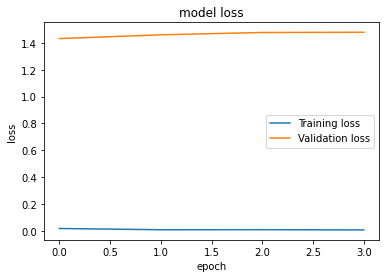

In [ ]:
plt.plot(adagrad_history.history['loss'], label= 'Training loss')
plt.plot(adagrad_history.history['val_loss'], label= 'Validation loss')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

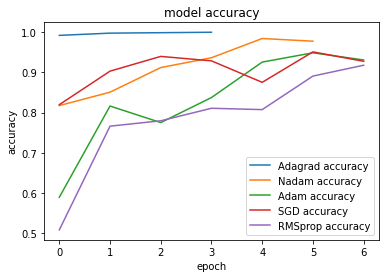

In [ ]:
plt.plot(adagrad_history.history['accuracy'], label= 'Adagrad accuracy')
plt.plot(nadam_history.history['accuracy'], label= 'Nadam accuracy')
plt.plot(adam_history.history['accuracy'], label= 'Adam accuracy')
plt.plot(sgd_history.history['accuracy'], label= 'SGD accuracy')
plt.plot(rms_history.history['accuracy'], label= 'RMSprop accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

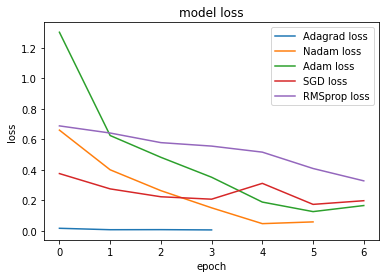

In [ ]:
plt.plot(adagrad_history.history['loss'], label= 'Adagrad loss')
plt.plot(nadam_history.history['loss'], label= 'Nadam loss')
plt.plot(adam_history.history['loss'], label= 'Adam loss')
plt.plot(sgd_history.history['loss'], label= 'SGD loss')
plt.plot(rms_history.history['loss'], label= 'RMSprop loss')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
   #predicting images
  path =   fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving Deepam.jpg to Deepam (1).jpg
[1. 0.]


ValueError: ignored